<a href="https://colab.research.google.com/github/ceofast/-Fuel-Consumption-Prediction-from-Kaggle/blob/main/Introduction_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI90201 Neural Networks

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.7)

In [2]:
import pandas as pd

data = pd.DataFrame(X)

data.insert(784, 'label', y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


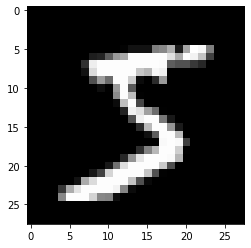

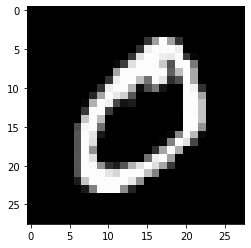

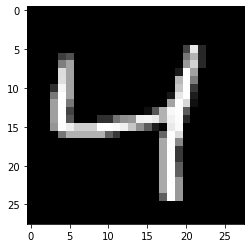

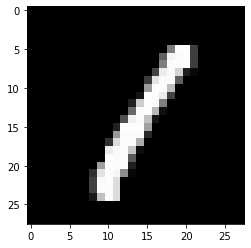

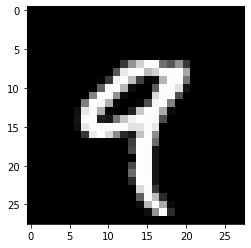

In [4]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap = 'gray')
  plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = 1, activation = 'logistic')

mlp1 = MLPClassifier(hidden_layer_sizes = 100, activation = 'logistic')

mlp2 = MLPClassifier(hidden_layer_sizes = 1000, activation = 'logistic')

In [6]:
mlp.fit(X_train, y_train)

mlp1.fit(X_train, y_train)

mlp2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [7]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['6', '4', '1', ..., '3', '1', '4'], dtype='<U1')

In [8]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '8', '3', '2'], dtype='<U1')

In [9]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '8', '3', '9'], dtype='<U1')

Actual Value: 4
Predicted Value For 1 Hidden Layer: 4
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


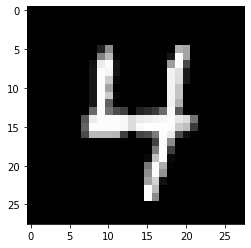

In [10]:
print(f'Actual Value: {y_test[1]}')
print(f'Predicted Value For 1 Hidden Layer: {predictions_NN[1]}')
print(f'Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}')
print(f'Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}')

plt.imshow(X_test[1].reshape((28,28)), cmap='gray')
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)

array([[ 106, 1060,    0,  164,   16,    0, 3548,   17,    0,    0],
       [  59, 4731,    0,  496,   45,    0,  177,   36,    0,    0],
       [ 112, 1900,    0,  633,   51,    0, 2167,   33,    0,    0],
       [  10,  740,    0, 2994,  636,    0,  175,  431,    0,    0],
       [   0,   97,    0,  686, 2092,    0,   19, 1874,    0,    0],
       [  16,  768,    0, 2491,  551,    0,  119,  439,    0,    0],
       [  46,  505,    0,   88,   10,    0, 4130,    1,    0,    0],
       [   0,   51,    0,  114,  131,    0,    4, 4772,    0,    0],
       [   5,  869,    0, 2872,  545,    0,   49,  417,    0,    0],
       [   0,   33,    0,  160,  240,    0,    9, 4460,    0,    0]])

In [12]:
confusion_matrix(y_test, predictions_NN1)

array([[4794,    2,   13,    7,   10,   15,   36,    7,   21,    6],
       [   2, 5475,   22,   11,    4,    3,    3,    8,    8,    8],
       [  15,    8, 4721,   22,   37,    2,   17,   34,   34,    6],
       [   6,   11,   69, 4711,    3,   86,    5,   27,   47,   21],
       [   3,   11,   15,    4, 4610,    4,   27,   14,    7,   73],
       [  13,    7,   16,   62,   16, 4169,   42,    8,   27,   24],
       [  17,   11,   11,    3,   21,   27, 4673,    4,   13,    0],
       [   6,   17,   42,   13,   36,    3,    0, 4911,    5,   39],
       [  25,   38,   33,   37,   16,   45,   21,    7, 4509,   26],
       [  14,    9,   10,   35,   92,   24,    2,   67,   18, 4631]])

In [13]:
confusion_matrix(y_test, predictions_NN2)

array([[4823,    2,   13,    6,    5,   13,   21,    3,   17,    8],
       [   1, 5476,   27,    8,    5,    1,    5,    5,    7,    9],
       [  17,    8, 4760,   17,   28,    2,   14,   25,   20,    5],
       [   6,   11,   65, 4751,    5,   60,    3,   15,   49,   21],
       [   5,   14,   15,    2, 4612,    3,   20,    9,    7,   81],
       [  16,    7,   10,   39,    8, 4228,   29,    7,   22,   18],
       [  20,   11,   20,    4,   16,   19, 4671,    6,   13,    0],
       [   1,   21,   52,   18,   37,    5,    0, 4877,   10,   51],
       [  18,   31,   23,   32,   14,   29,   19,    1, 4564,   26],
       [  20,   13,    1,   27,   56,   26,    3,   44,   20, 4692]])

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_NN))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.30      0.02      0.04      4911
           1       0.44      0.85      0.58      5544
           2       0.00      0.00      0.00      4896
           3       0.28      0.60      0.38      4986
           4       0.48      0.44      0.46      4768
           5       0.00      0.00      0.00      4384
           6       0.40      0.86      0.54      4780
           7       0.38      0.94      0.54      5072
           8       0.00      0.00      0.00      4757
           9       0.00      0.00      0.00      4902

    accuracy                           0.38     49000
   macro avg       0.23      0.37      0.26     49000
weighted avg       0.23      0.38      0.26     49000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(classification_report(y_test, predictions_NN1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.96      0.96      4896
           3       0.96      0.94      0.95      4986
           4       0.95      0.97      0.96      4768
           5       0.95      0.95      0.95      4384
           6       0.97      0.98      0.97      4780
           7       0.97      0.97      0.97      5072
           8       0.96      0.95      0.95      4757
           9       0.96      0.94      0.95      4902

    accuracy                           0.96     49000
   macro avg       0.96      0.96      0.96     49000
weighted avg       0.96      0.96      0.96     49000



In [16]:
print(classification_report(y_test, predictions_NN2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4911
           1       0.98      0.99      0.98      5544
           2       0.95      0.97      0.96      4896
           3       0.97      0.95      0.96      4986
           4       0.96      0.97      0.97      4768
           5       0.96      0.96      0.96      4384
           6       0.98      0.98      0.98      4780
           7       0.98      0.96      0.97      5072
           8       0.97      0.96      0.96      4757
           9       0.96      0.96      0.96      4902

    accuracy                           0.97     49000
   macro avg       0.97      0.97      0.97     49000
weighted avg       0.97      0.97      0.97     49000



## AI9022 Training Neural Networks

There are two types of parameters in any deep learning model.

* Hyperparameters
* Learnable 

Hyperparameters are the parameters that we humans can adjust. Examples of Hyperparameters can be the learning rate, number of hidden layers or number of nodes.

## AI9032 Build an Artificial Neural Network

#### Classifying Dates

In tihs project, we will build a neural network to classify dates. For this we will use the "Date Fruit Dataset" available on Kaggle. This dataset includes samples of dates that can be classified into 7 classes according to their types.

### Importing the required libraries

We'll start with importing required libraries.
Use the keywords "import" and "from".

In [10]:
# Import Pandas and Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

### Dataset

Let's load the .xlsx file.

Use the read_excel() function of the Pandas library.

In [13]:
# Read the "date_fruit.xlsx" file

data = pd.read_excel('/content/date_fruit.xlsx')

Next, we take a look at the dataset.

Use the data.head() function.

Use .shape attribute and .uniqe() methods.



In [14]:
# Use the head() function to display the first 5 rows of the data.

data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [15]:
# Print the shape pof data and classes

print(data.shape)

print(data['Class'].unique())

(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


### Preprocessing

Now that we have a better understanding of our data, let's split the dataset into features and labels.

Create X and y datasets using .drop() and .loc() methods

In [16]:
# Create the features dataset
X = data.drop('Class', axis = 1)

# Create the labels dataset
y = data.loc[:,'Class']

### Feature Scaling

Having features in different units or ranges can be problematic in deep learning. We need to scale all of the values between the 0 and 1 range.

Use the minmax_scale() function of the sklearn library.

In [17]:
# Normalize the features dataset and assign it to a variable.
X_scaled = minmax_scale(X)

# Create a DataFrame using the new variable

X = pd.DataFrame(X_scaled)

Then, we print the X data again so we can see the difference.


Use the .head() method

In [18]:
# Print the newly created DataFrame

X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.772274,0.772079,0.565604,0.841941,0.446429,0.871512,0.983209,0.767108,0.787438,0.000435,...,0.395739,0.062495,0.053715,0.080752,0.458253,0.455197,0.546327,0.673513,0.550537,0.494665
1,0.617835,0.617480,0.436904,0.775906,0.342186,0.773229,1.000000,0.611906,0.776970,0.000282,...,0.350002,0.037387,0.040885,0.046033,0.687312,0.599151,0.643352,0.538923,0.516341,0.494501
2,0.964674,0.913374,0.681733,0.933143,0.464896,0.981104,0.992537,0.956896,0.736842,0.000467,...,0.472509,0.083531,0.089677,0.096843,0.139263,0.194220,0.312066,0.777967,0.619782,0.573507
3,0.761063,0.757502,0.554467,0.841456,0.430098,0.864727,0.983831,0.755891,0.766502,0.000408,...,0.687121,0.136202,0.278800,0.213061,0.707125,0.657830,0.665214,0.436260,0.377376,0.366683
4,0.635159,0.657060,0.482240,0.759716,0.460470,0.784821,0.958955,0.633316,0.711253,0.000459,...,0.464794,0.040608,0.054459,0.086850,0.634560,0.615256,0.710963,0.581443,0.485820,0.395128


Our features are ready for training. Now it's time to prepare the labels.

Print y to take a look at it.

In [19]:
# Print the y array

y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

Artificial intelligence algorithms can't use any string data when training a model because mathematical operations can't be done on them.

Use the LabelEncoder of the sklearn library to converting strings to integer. 

In [20]:
# Create an LabelEncoder object.
encoder = LabelEncoder()

# Convert string classes to integers using fit_transform() method
y = encoder.fit_transform(y)


Then, we print y to check the result.

In [21]:
# Print the y array
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Splitting 

Great, that worked out as we wanted it to. We now split the dataset into training, validation and test datasets. In general, the ratio for splitting is 80% for training, 10% for validation and 10% for test sets.

Use train_Test_split function of the sklearn library.

In [22]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size = 0.8)

# Using the X_temporary and y_temporary dataset we just created create validation and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size = 0.5)


Let's print the total length of th initial dataset and lengths of the newly created datasets to check our results.

Use the len() function to print the lengths.

In [23]:
# Print the lengths of the X, X_train, X_val and X_test

print(f'Length of the dataset: {len(X)}')
print(f'Length of the training dataset: {len(X_train)}')
print(f'Length of the validation dataset: {len(X_val)}')
print(f'Length of the test dataset: {len(X_test)}')

Length of the dataset: 898
Length of the training dataset: 718
Length of the validation dataset: 90
Length of the test dataset: 90


### Constructing the Neural Network

And with that our data is ready to be used in a model. We can move on to the exciting part: constructing a deep learning model. We'll use TensorFlow for this. To speed up the training time activate the GPU of Google Colab.

Import TensorFlow

In [24]:
# Import TensorFlow
import tensorflow as tf

Let's start by creating a model object using Sequential API of Keras.

Use tf.keras.Sequential() to create a model object

In [25]:
# Create a model object

model = tf.keras.Sequential()

### Input Layer

First, we construct an input layer and assing it to a variable. The first argument is the number of nodes we want in that hidden layer. Only for the input layer we have to set input_shape argument which is number of columns , in this case 34. For the activation function we specify "ReLU".

Use tf.keras.layers.Dense() to create the layer.

Use .add() method of the object to add the layer.

In [26]:
# Create an input layer 
input_layer = tf.keras.layers.Dense(4096, input_shape = (34,), activation = 'relu')

# Add input layer to model object
model.add(input_layer)

### Hidden Layer

Next, we need to add the hidden layers. We'll add 4 hidden layers each with 4096 nodes. Again, we specify ReLU as the activation functions and 0.5 dropouts.

Use tf.keras.layers.Dense() to create the layers.

Use .add() method of the object to add the layer.

In [27]:
# Add the first hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the second hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the third hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))

# Add the fourth hidden layer with 4096 nodes and relu activation function
model.add(tf.keras.layers.Dense(4096, activation = 'relu'))

# Add 0.5 dropout
model.add(tf.keras.layers.Dropout(0.5))


### Output Layer

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 7 in our case. We'll use the softmax activation function in the output layer.

In [28]:
# Add the output layer
model.add(tf.keras.layers.Dense(7, activation = 'softmax'))

### Optimizer 

Now we have the structure of our model. To configure the model for training we'll use the .compile() method. Inside the compile method we have to define the following:

* "Adam" for optimizer

* "Sparse Categorical Crossentropy" for the loss function

Construct the model with the .compile() method

In [29]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first wto arguments. These will be used for training. And with the validation_data parameter we'll give the X_val and y_val as a tuple.

* Use .fit() method of the model object for the training.

In [30]:
# Train the model for 100 epochs
results = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val))

Epoch 1/100
23/23 [==============================] - 4s 26ms/step - loss: 1.6604 - accuracy: 0.3691 - val_loss: 0.8462 - val_accuracy: 0.6667
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 0.8242 - accuracy: 0.6908 - val_loss: 0.8757 - val_accuracy: 0.6556
Epoch 3/100
23/23 [==============================] - 0s 17ms/step - loss: 0.6946 - accuracy: 0.7354 - val_loss: 0.6356 - val_accuracy: 0.7333
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.5670 - accuracy: 0.7953 - val_loss: 0.8901 - val_accuracy: 0.7444
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.5715 - accuracy: 0.7841 - val_loss: 0.4733 - val_accuracy: 0.8222
Epoch 6/100
23/23 [==============================] - 0s 17ms/step - loss: 0.4897 - accuracy: 0.8036 - val_loss: 0.5923 - val_accuracy: 0.8111
Epoch 7/100
23/23 [==============================] - 0s 17ms/step - loss: 0.5878 - accuracy: 0.7688 - val_loss: 0.5785 - val_accuracy: 0.8222
Epoch 

### Visualize the Result

After the model is trained we can create a graph to visualize the chamge of loss over time. Results are held in:

* results.history["loss"]

* results.history["val_loss"]

Use plt.show() to display the graph.

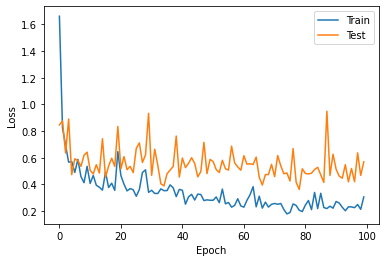

In [31]:
# Plot the training loss
plt.plot(results.history['loss'], label = 'Train')

# Plot the validation loss
plt.plot(results.history['val_loss'], label = 'Test')

# Name the x and y axises
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Put legend table
plt.legend()

# Show the plot
plt.show()

### Performance Evaluation

Finally, we are going to use the test dataset we created to evaluate the performance of the model.

Use test_on_batch() method with test dataset as parameter

In [32]:
# Evaluate the performance
test_result = model.test_on_batch(X_test, y_test)

# Print the result
print(test_result)

[0.2716849446296692, 0.9222221970558167]
